In [ ]:
!pip install opencv-python

In [ ]:
!pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
#from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import to_categorical
print('Libraries Imported')

Libraries Imported


In [ ]:
!pip list

In [ ]:
#os.environ["CUDA_VISIBLE_DEVICES"]="0"
#from tensorflow.python.client import device_lib
#print (device_lib.list_local_devices())
print("---------------------------------------")
print(tf.config.list_physical_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

---------------------------------------
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [ ]:
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_train type : ", type(x_train))
print("y_train type : ", type(y_train))
x_train = x_train.reshape(60000, 784).astype('float32')/255
y_train = to_categorical(y_train, num_classes=10)
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_train type : ", type(x_train))
print("y_train type : ", type(y_train))

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_train type :  <class 'numpy.ndarray'>
y_train type :  <class 'numpy.ndarray'>
x_train :  (60000, 784)
y_train :  (60000, 10)
x_train type :  <class 'numpy.ndarray'>
y_train type :  <class 'numpy.ndarray'>


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
print(type(model))

<class 'keras.engine.sequential.Sequential'>


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd",metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=10, verbose=0)

In [ ]:
_, (x_test_, y_test_)= tf.keras.datasets.mnist.load_data()
x_test = x_test_.reshape(10000, 784).astype('float32')/255
y_test = to_categorical(y_test_, num_classes=10)
print('x_train Type : ', type(x_train))
print('y_train Type : ', type(y_train))
print('x_test Type : ', type(x_test))
print('y_test Type : ', type(y_test))
print('x_train Shape : ', x_train.shape)
print('y_train Shape : ', y_train.shape)
print('x_test Shape : ', x_test.shape)
print('y_test Shape : ', y_test.shape)
print('x_test_ Shape : ', x_test_.shape)
print('y_test_ Shape : ', y_test_.shape)

x_train Type :  <class 'numpy.ndarray'>
y_train Type :  <class 'numpy.ndarray'>
x_test Type :  <class 'numpy.ndarray'>
y_test Type :  <class 'numpy.ndarray'>
x_train Shape :  (60000, 784)
y_train Shape :  (60000, 10)
x_test Shape :  (10000, 784)
y_test Shape :  (10000, 10)
x_test_ Shape :  (10000, 28, 28)
y_test_ Shape :  (10000,)


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy :', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.4258 - accuracy: 0.8926
Test Accuracy : 0.8925999999046326


10000
(10000, 784)
<class 'matplotlib.image.AxesImage'>


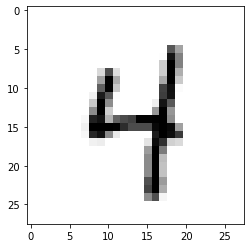

In [ ]:
image_loc = 19
print(len(x_test_))
print(x_test.shape)
image = plt.imshow(x_test_[image_loc], cmap=plt.cm.binary)
print(type(image))

313/313 [==============================] - 1s 3ms/step
x_test shape (10000, 784)
Model prediction:  4
Model prediction Array:  [8.5641810e-04 7.4783975e-04 1.2430995e-03 1.8787166e-03 8.3724141e-01
 6.3679931e-03 1.3886225e-02 7.5520570e-03 7.2500817e-03 1.2297629e-01]


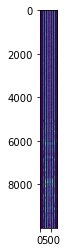

In [ ]:
prediction = model.predict(x_test)
print(f"x_test shape {x_test.shape}")
#print(type(prediction))
print("Model prediction: ", np.argmax(prediction[image_loc]) )
print("Model prediction Array: ", prediction[image_loc])


# Testing New User Imput

In [ ]:
from PIL import Image

In [ ]:
path = 'R:/AI ML DS/1_image.jpg'
img = cv.imread(path)

(474, 474, 3)


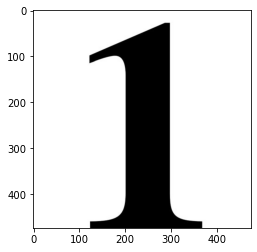

In [ ]:
plt.imshow(img, cmap=plt.cm.binary)
print(img.shape)

new img shape : (28, 28)
d img shape : (28, 28)
r img : (1, 784)
1/1 [==============================] - 0s 34ms/step
3


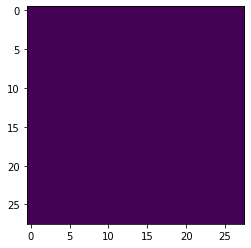

In [ ]:
new_img = np.resize(img, (28,28))
print(f"new img shape : {new_img.shape}")
#plt.imshow(new_img)

d_img = new_img / 255
print(f"d img shape : {d_img.shape}")
#plt.imshow(d_img)

r_img = np.reshape(d_img,(1, 28* 28))
print(f"r img : {r_img.shape}")
#plt.imshow(r_img)

prediction = model.predict(r_img)
print(np.argmax(prediction))

# Testing User Input

In [ ]:
my_img = cv.imread('/content/number_zero.png')

In [ ]:
print(my_img.shape)

(370, 353, 3)


My Gray Image Dimensions :  (28, 28, 1)
My Gray Test Image Dimensions :  (1, 784)
My Image Dimensions :  (28, 28, 3)


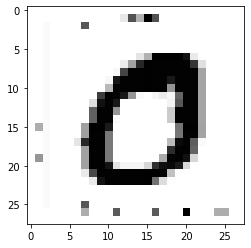

In [ ]:
my_img_resize = cv.resize(my_img, (28,28))
my_img_reshape = my_img_resize.astype('float32')/255
#my_img_reshape = my_img_resize.reshape(1,784).astype('float32')/255
#plt.imshow(my_img, cmap=plt.cm.binary)
gray_my_img = cv.cvtColor(my_img_reshape, cv.COLOR_BGR2GRAY)
gray_my_img = np.expand_dims(gray_my_img, 2)
print("My Gray Image Dimensions : ",gray_my_img.shape)
gray_my_img_reshape = gray_my_img.reshape(1,784).astype('float32')/255
print("My Gray Test Image Dimensions : ",gray_my_img_reshape.shape)
plt.imshow(my_img_reshape)
print("My Image Dimensions : ",my_img_reshape.shape)

In [ ]:
#my_num_prediction = model.predict(my_img_reshape)
my_num_prediction = model.predict(gray_my_img_reshape)
print("Model prediction: ", np.argmax(my_num_prediction))
print("Model prediction: ", my_num_prediction )

Model prediction:  7
Model prediction:  [[0.05010388 0.125379   0.09636813 0.10883628 0.08176217 0.12273619
  0.07537106 0.1853457  0.03883319 0.11526445]]
